In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('open/train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   road_in_use            int64  
 5   lane_count             int64  
 6   road_rating            int64  
 7   road_name              object 
 8   multi_linked           int64  
 9   connect_code           int64  
 10  maximum_speed_limit    float64
 11  vehicle_restricted     float64
 12  weight_restricted      float64
 13  height_restricted      float64
 14  road_type              int64  
 15  start_node_name        object 
 16  start_latitude         float64
 17  start_longitude        float64
 18  start_turn_restricted  object 
 19  end_node_name          object 
 20  end_latitude           float64
 21  end_longitude          float64
 22  end_turn_restricte

In [65]:
df = train_data.copy()

In [66]:
except_list = ['id', 'day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted','road_in_use', 'end_node_name', 'end_turn_restricted', 'vehicle_restricted', 'height_restricted']

In [67]:
df = df.drop(except_list, axis = 1)

In [68]:
y = df['target']
x = df.drop('target', axis = 1)

In [69]:
scaler = RobustScaler()
rbs_x = scaler.fit_transform(x)

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state = 0)
pca_x = pca.fit_transform(rbs_x)

In [11]:
pca_x.shape

(4701217, 13)

In [34]:
aa = pd.DataFrame(pca_x, columns = tmp)

In [33]:
tmp = []
for i in range(13):
    tmp.append( "pc_{}".format(i) )

In [38]:
aa

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12
0,26781.257727,-0.073563,1.214121,-0.098647,0.598595,-0.575204,-0.390892,-0.242385,-0.385265,-0.402925,-0.001200,-0.002881,-0.000031
1,-5618.742412,-0.304731,0.113900,0.372510,-0.366591,-0.581739,-0.752346,-0.323710,-0.373660,0.461662,-0.011176,0.001077,-0.014671
2,-5618.742404,-0.293459,-1.435277,0.212776,-0.504077,0.529387,0.410946,1.159359,0.093369,0.017888,-0.028039,0.000537,-0.005905
3,-5618.742406,-0.320513,0.337211,-0.832669,0.196044,0.871720,-0.076827,-0.429379,-0.146880,-0.040274,-0.004418,-0.000919,0.001263
4,-5618.742412,-0.284075,-1.663866,0.775149,-0.711135,-0.447085,0.304311,0.750040,0.257620,-0.049313,0.015765,0.001443,-0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,-5618.742413,-0.277998,-2.057683,-0.894326,0.142931,-0.926444,-0.287941,0.032349,0.626368,-0.326772,-0.019552,-0.000371,0.002144
4701213,37581.257686,0.032017,-0.953817,0.871102,-0.617664,-0.214166,0.756417,-0.573658,-0.139779,-0.894537,0.002018,0.001271,-0.000011
4701214,-5618.742398,-0.348946,3.453646,0.203849,-0.324215,0.040882,-0.854387,-0.141785,-0.437916,0.512448,0.000733,-0.000572,0.010223
4701215,-5618.742408,-0.295974,-0.758581,0.746820,-0.709255,-0.248700,0.797820,0.787883,0.259470,-0.042195,0.006964,0.001083,-0.004015


In [49]:
aa.iloc[:,:1]

,pc_0
0,26781.257727
1,-5618.742412
2,-5618.742404
3,-5618.742406
4,-5618.742412
...,...
4701212,-5618.742413
4701213,37581.257686
4701214,-5618.742398
4701215,-5618.742408


In [52]:
mn = []
score = []

for c in range(1, 13):
    
    mn.append(c)
    
    cc = aa.iloc[:, :c]
    
    x_train, x_test, y_train, y_test = train_test_split(cc, y, test_size = 0.3, random_state=0)
    
    knn = KNeighborsRegressor(n_neighbors = 5)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    score.append(mean_absolute_error(y_test, knn_pred) )

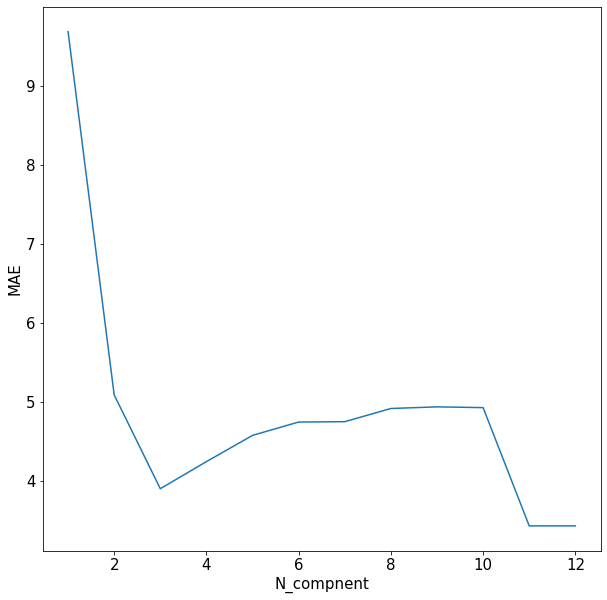

In [58]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(mn,score) ## 선그래프 생성

plt.xlabel("N_compnent",fontsize= 15)
plt.ylabel("MAE",fontsize= 15)
 
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)## x축 눈금 라벨 설정 - 40도 회전 
plt.show()

In [71]:
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.3, random_state=0)

In [72]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
mean_absolute_error(y_test, knn_pred) 

3.8977357650425497

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
mean_absolute_error(y_test, lr_pred)

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mean_absolute_error(y_test, rf_pred)

In [ ]:
len(x_train)

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)
svm_pred = svr.predict(x_test)
mean_absolute_error(y_test, svr_pred)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ARDRegression, BayesianRidge

In [ ]:
linear = LinearRegression()
l1, l2 = Lasso(), Ridge()
ardr_linear, nb = ARDRegression(), BayesianRidge()

In [ ]:
linear.fit(x_train, y_train)
l1.fit(x_train, y_train)
l2.fit(x_train, y_train)
ardr_linear.fit(x_train, y_train)
nb.fit(x_train, y_train)

linear_pred = linear.predict(x_test)
l1_pred, l2_pred = l1.predict(x_test), l2.predict(x_test)
ardr_pred, nb_pred = ardr_linear.predict(x_test), nb.predict(x_test)

In [ ]:
mean_absolute_error(y_test, linear_pred)

In [ ]:
mean_absolute_error(y_test, l1_pred)

In [ ]:
mean_absolute_error(y_test, l2_pred)

In [ ]:
mean_absolute_error(y_test, ardr_pred)

In [ ]:
mean_absolute_error(y_test, nb_pred)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators = 400, learning_rate = 0.001, max_depth = 5)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [56]:
import lightgbm as lgb

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state = 0)
pca_x = pca.fit_transform(rbs_x)

In [181]:
x_train, x_val, y_train, y_val = train_test_split(pca_x, y, test_size = 0.2, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size = 0.5, random_state=0)
train_ds = lgb.Dataset(x_train, label = y_train) 
val_ds = lgb.Dataset(x_val, label = y_val) 

In [207]:
params = {'learning_rate': 0.01, 
          'max_depth': 32, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mae', 
          'is_training_metric': True, 
          'num_leaves': 1028, 
          'feature_fraction': 0.5, 
          'bagging_fraction': 0.5, 
          'bagging_freq': 5, 
          'seed':2018}

In [208]:
lgb_md = lgb.train(params, train_ds, 5000, val_ds, verbose_eval=100, early_stopping_rounds=100)

C:\Users\DIQUEST\anaconda3\envs\mecab\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\DIQUEST\anaconda3\envs\mecab\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3760973, number of used features: 3
[LightGBM] [Info] Start training from score 42.786906
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7.13211
[200]	valid_0's l1: 5.61525
[300]	valid_0's l1: 5.22952
[400]	valid_0's l1: 5.11752
[500]	valid_0's l1: 5.07106
[600]	valid_0's l1: 5.04258
[700]	valid_0's l1: 5.02642
[800]	valid_0's l1: 5.01432
[900]	valid_0's l1: 5.00688
[1000]	valid_0's l1: 5.00059
[1100]	valid_0's l1: 4.99558
[1200]	valid_0's l1: 4.99163
[1300]	valid_0's l1: 4.98844
[1400]	valid_0's l1: 4.98577
[1500]	valid_0's l1: 4.98359
[1600]	valid_0's l1: 4.98183
[1700]	valid_0's l1: 4.98053
[1800]	valid_0's l1: 4.97909
[1900]	valid_0'

In [ ]:
lgb_pred = lgb_md.predict(x_test)

In [ ]:
mean_absolute_error(y_test, lgb_pred)

In [73]:
test_data = pd.read_csv('open/test.csv')

In [74]:
test_df = test_data.drop(except_list, axis = 1).copy()

In [75]:
scaler = RobustScaler()
rbs_test = scaler.fit_transform(test_df)
pca_test = pca.transform(rbs_test)

In [76]:
pca_test.shape

(291241, 3)

In [211]:
rs = lgb_md.predict(pca_test)

In [77]:
knn_rs = knn.predict(pca_test)

In [78]:
sub = pd.read_csv('open/sample_submission.csv')

In [79]:
sub['target'] = knn_rs

In [80]:
sub.to_csv('submission_knn2.csv', index = False)